In [9]:
import sys
sys.path.insert(0, 'C:/Users/Franco/Documents/AnacondaProjects/Predicting_Conflicts')
from Libs import *

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('C:/Users/Franco/Documents/AnacondaProjects/Predicting_Conflicts/DataVisualization/df_final_ver_3.csv', index_col=0)

In [3]:
df.head()

,year,country,amount,Tools,Vehicles,Weapons,Prom Tools,Prom Vehicles,Prom Weapons,conflict,conflict-1-to-3,conflict-4-to-6,conflict-7-to-9,Prom USA,country encoded
0,1946,Bolivia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,True,False,False,False,0.00,19
1,1952,Bolivia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,True,False,True,False,0.00,19
2,1967,Bolivia,0.00,0.00,53.00,24.00,0.00,9.33,0.00,True,False,False,False,0.00,19
3,1946,Cambodia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,True,False,False,False,0.00,27
4,1947,Cambodia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,True,True,False,False,0.00,27


In [4]:
df_argentina = df[df['country'] == 'Argentina'].sort_values('year')

df_argentina = df_argentina.iloc[:, 0:10]
df_argentina.head()

,year,country,amount,Tools,Vehicles,Weapons,Prom Tools,Prom Vehicles,Prom Weapons,conflict
5058,1946,Argentina,0.00,50.00,0.00,0.00,0.00,0.00,0.00,False
5059,1948,Argentina,0.00,0.00,15.00,100.00,16.67,0.00,0.00,False
5060,1950,Argentina,0.00,0.00,20.00,6.00,0.00,5.00,33.33,False
5061,1951,Argentina,0.00,0.00,2.00,0.00,0.00,11.67,35.33,False
5062,1953,Argentina,0.00,0.00,18.00,0.00,0.00,7.33,2.00,False


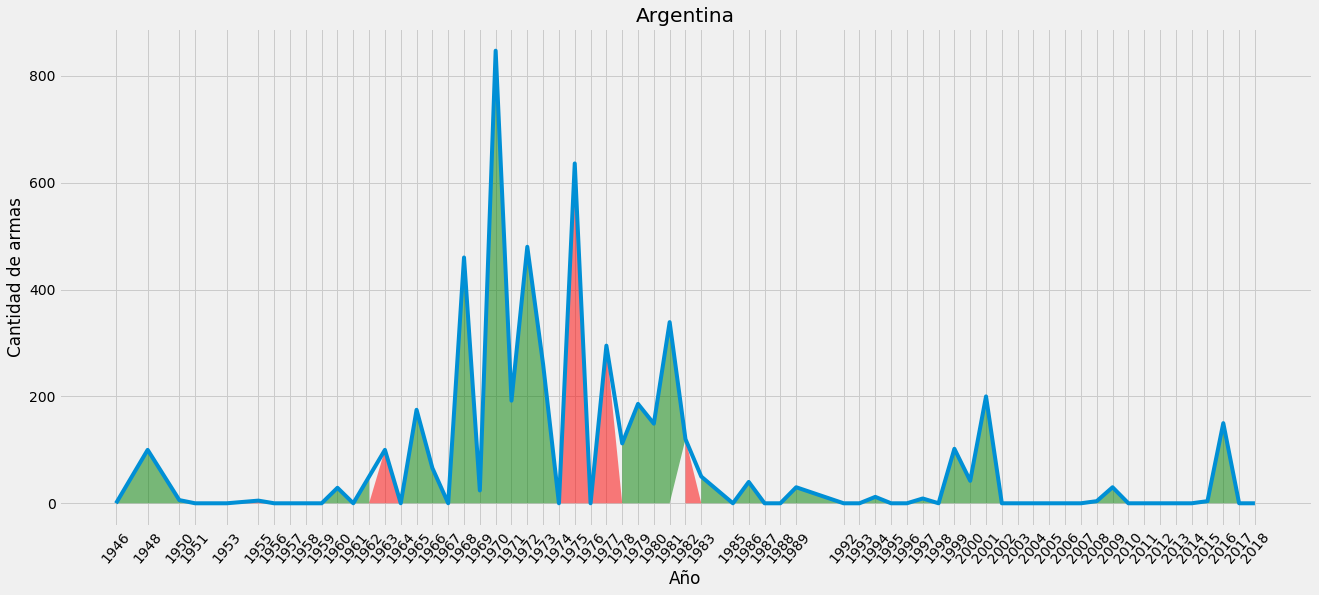

In [28]:
fig = plt.figure()
ax1 = plt.subplot2grid((7,1), (0,0), rowspan=6, colspan=1)
ax1.grid(True)
plt.title('Argentina')
plt.ylabel('Cantidad de armas')
plt.xlabel('Año')




ax1.set_xticks(df_argentina.iloc[:, 0])
plt.xticks(rotation=50)

ax1.plot(df_argentina.iloc[:, 0], df_argentina.iloc[:,5])
#ax1.plot(df_argentina.iloc[:, 0], df_argentina.iloc[:,2])

ax1.fill_between(df_argentina.iloc[:, 0],0,  df_argentina.iloc[:, 5], where=(df_argentina['conflict'] == True), facecolor='r', alpha=0.5, interpolate=True)
ax1.fill_between(df_argentina.iloc[:, 0], df_argentina.iloc[:, 5], where=(df_argentina['conflict'] == False), facecolor='g', alpha=0.5, interpolate=True)

#ax1.fill_between(df_argentina.iloc[:, 0], df_argentina.iloc[:, 8], alpha=0.3)

#ax1.plot(df_argentina.iloc[:, 0], df_argentina.iloc[:,4])
#ax1.plot(df_argentina.iloc[:, 0], df_argentina.iloc[:,3])
#ax1.plot(df_argentina.iloc[:, 0], df_argentina.iloc[:,2])
plt.savefig('argentina.png')
plt.show()